In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [34]:
df = pd.read_csv('./data/IBOV.csv')

In [51]:
df_target = df['Close']
df_data = df.drop(columns=['Close','Date'])

In [111]:
columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
shifts = 4
for column in columns:
    for i in range(shifts):
        df_data[[column + str(i)]] = df_data[[column]].shift(-i).diff()
df_data = df_data.dropna()
df_target = df_target.shift(-shifts)

In [114]:
# Importing the dataset
# forecasting = 3
# X = df.drop(columns=['Close','Date']).values[:-forecasting]
# y = df['Close'].shift(-forecasting).dropna().values
X = df_data.values
y = df_target.values[:-10]

Epoch 1/100
340/340 [==============================] - 0s 297us/step - loss: 7340699708.2353
Epoch 2/100
340/340 [==============================] - 0s 47us/step - loss: 2090604476.2353
Epoch 3/100
340/340 [==============================] - 0s 53us/step - loss: 1972726885.6471
Epoch 4/100
340/340 [==============================] - 0s 59us/step - loss: 931779147.2941
Epoch 5/100
340/340 [==============================] - 0s 56us/step - loss: 785395925.6471
Epoch 6/100
340/340 [==============================] - 0s 59us/step - loss: 569127578.3529
Epoch 7/100
340/340 [==============================] - 0s 65us/step - loss: 430468739.7647
Epoch 8/100
340/340 [==============================] - 0s 53us/step - loss: 394461944.4706
Epoch 9/100
340/340 [==============================] - 0s 59us/step - loss: 356835727.0588
Epoch 10/100
340/340 [==============================] - 0s 53us/step - loss: 305034176.0000
Epoch 11/100
340/340 [==============================] - 0s 68us/step - loss: 27188190

340/340 [==============================] - 0s 47us/step - loss: 36338213.1765
Epoch 90/100
340/340 [==============================] - 0s 41us/step - loss: 42616820.7059
Epoch 91/100
340/340 [==============================] - 0s 44us/step - loss: 37988014.3529
Epoch 92/100
340/340 [==============================] - 0s 47us/step - loss: 33968815.0588
Epoch 93/100
340/340 [==============================] - ETA: 0s - loss: 26126176.00 - 0s 56us/step - loss: 29292767.6471
Epoch 94/100
340/340 [==============================] - 0s 44us/step - loss: 31579843.7647
Epoch 95/100
340/340 [==============================] - 0s 44us/step - loss: 33455582.5882
Epoch 96/100
340/340 [==============================] - 0s 50us/step - loss: 28080628.0000
Epoch 97/100
340/340 [==============================] - 0s 47us/step - loss: 24230300.2353
Epoch 98/100
340/340 [==============================] - 0s 50us/step - loss: 23883098.3529
Epoch 99/100
340/340 [==============================] - 0s 53us/step - lo

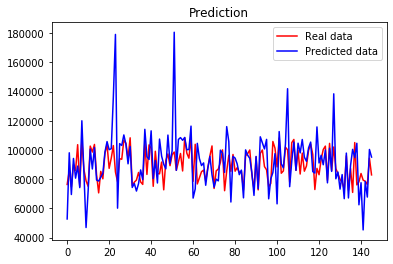

In [120]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Initialising the ANN
model = Sequential()
model.add(Dense(100, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 80, epochs = 100)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

dict_keys(['loss'])


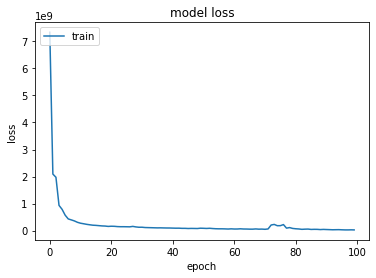

In [121]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [122]:
forecast = y_pred
actual = y_test

mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
me = np.mean(forecast - actual)                           # ME
mae = np.mean(np.abs(forecast - actual))                  # MAE
mpe = np.mean((forecast - actual)/actual)                 # MPE
rmse = np.mean((forecast - actual)**2)**.5                # RMSE
print('mape: %s' % mape)
print('me: %s' % me)
print('mae: %s' % mae)
print('mpe: %s' % mpe)
print('rmse: %s' % rmse)

mape: 0.1874214187388977
me: 2842.118926583904
mae: 16373.235840668394
mpe: 0.04654217211362418
rmse: 22008.940573462467


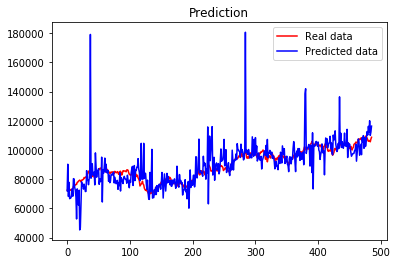

In [123]:
y_pred = model.predict(X)
plt.plot(y, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()